# Lista de Exercícios - Aula de Redes Neurais e Deep Learning

### Questão 1 - O que seria um problema não linearmente separável? Explique utilizando o problema da porta lógica XOR. Argumente sobre o motivo do Perceptron de Rosenblatt (1958) não conseguir resolver este tipo de problema.

Resposta: É aquele problema em que não se pode separar as 2 classes (diferentes, óbvio) no eixo cartesiano bidimensional com apenas uma reta. Um bom exemplo de problema não linearmente separável é a porta lógica XOR (onde a saída é 1 para entradas diferentes). A porta XOR funciona assim:

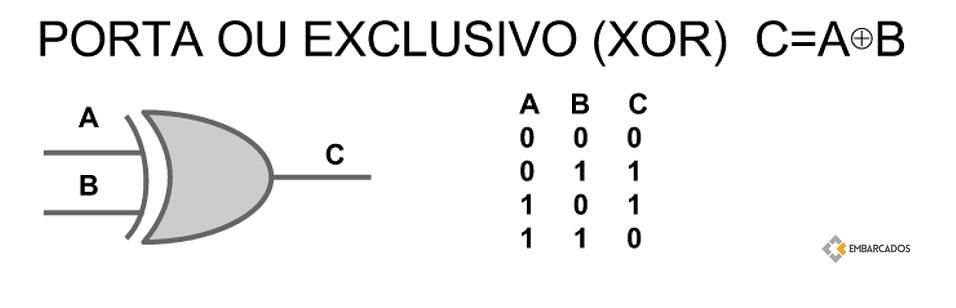

Como pode ser visto abaixo, é impossível separar o vermelho (1 - primeira classe) do azul (0 - segunda classe) com apenas uma reta (mesmo tentando de várias formas).



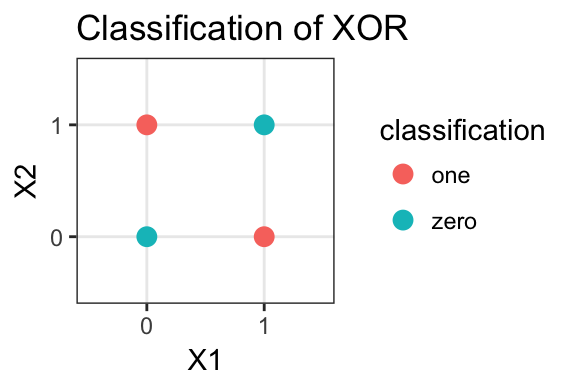

O Perceptron de Rosenblatt (1958) não irá conseguir resolver problemas não linearmente separáveis (a porta XOR, como tomamos exemplo) porque ele só pode traçar uma reta (ou seja, resolver problemas linearmente separáveis). Através dele não conseguimos resolver o problema da porta XOR, como já dito, mas conseguimos resolver o problema da porta OR e AND. Agora se você montar a porta XOR combinando portas AND e OR, o problema se torna lineramente separável e portanto, conseguimos o Perceptron de Rosenblatt para resolve-lo. 

### Questão 2 - Por que uma das estratégias para treinamento da rede neural é baseado no gradiente descendente e qual a relação do gradiente com a atualização dos pesos dos neurônios.

Resposta: Através do gradiente é possível simbolizar o erro através de uma função que cresce ou decresce consoante com o erro, isso sendo usado a regra de aprendizagem do erro (que, como já de nosso conhecimento, irá afeiçoar o peso da rede neural). O Backpropagation depende do coeficiente de peso, como também da saída. A derivada parcial da saída vai depender da variação da derivada do peso. Com o resultado em mãos, temos que fazer a minimização do erro. Como o vetor gradiante irá apontar para onde a função cresce, deve-se apontar para o sentido oposto.

### Questão 3 - Considerando o dataset diabetes.csv, o mesmo utilizado nas atividades das aulas de machine learning, faça o treinamento e avalie as métricas de teste, para os modelos Shallow e Deep vistos em aula. Compare os resultados considerando as métricas: Acurácia, Tempo de treino e tempo de teste em relação aos classificadores MLP, KNN e QDA (vistos na aula de machine learning). Crie uma tabela com as métricas e liste os resultados, comente brevemente os resultados apresentados. Considere a Tabela 1 1 para listar os resultados.

In [8]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import time

In [9]:
def load_base():
    data = pd.read_csv("diabetes.csv")
    X = data.iloc[:, :-1].values  
    z = data.iloc[:, 8].values
    lab = LabelEncoder()
    z[:] = lab.fit_transform(z[:])
    y = z.astype('int') 
    
    return X,y
    
    X.shape



In [10]:
X, y = load()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
acuracia = []
tempo_de_treino = []
tempo_de_teste = []

# *Modelo Shallow*

In [12]:
modelo_shallow = Sequential()
modelo_shallow.add(Dense(1, input_shape=(8,), activation='sigmoid'))
modelo_shallow.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])

In [13]:
ti_treino = time.time()
modelo_shallow.fit(X_train, y_train, epochs=200, verbose=1)
tf_treino = time.time()

time_treino_shallow = tf_treino - ti_treino
tempo_de_treino.append(time_treino_shallow)

Epoch 1/200
17/17 [==============================] - 1s 2ms/step - loss: 32.7743 - accuracy: 0.4430
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 8.7669 - accuracy: 0.6702
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 4.0670 - accuracy: 0.6659
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 3.5100 - accuracy: 0.6335
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 2.8014 - accuracy: 0.6225
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 1.7881 - accuracy: 0.7018
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 1.7866 - accuracy: 0.5986
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 1.0803 - accuracy: 0.6405
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 1.0662 - accuracy: 0.5686
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.9546 - accuracy: 0.6206
Epoch 11

In [19]:
ti_teste = time.time()
resultado_shallow = modelo_shallow.evaluate(X_test, y_test)
tf_teste = time.time()

time_teste_shallow = tf_teste - ti_teste

tempo_de_teste.append(time_teste_shallow)
acuracia.append(resultado_shallow[1])



8/8 [==============================] - 0s 2ms/step - loss: 0.7263 - accuracy: 0.6970


In [20]:
print('Acurácia: ', resultado_shallow[1])
print('Tempo de treino: ', time_treino_shallow)
print('Tempo de Teste: ', time_teste_shallow)


Acurácia:  0.6969696879386902
Tempo de treino:  9.996330976486206
Tempo de Teste:  0.09597444534301758


# *Model Deep*


In [17]:
modelo_deep = Sequential()
modelo_deep.add(Dense(4, input_shape=(8,), activation='tanh')) 
modelo_deep.add(Dense(2, input_shape=(16,), activation='tanh')) 
modelo_deep.add(Dense(1, input_shape=(8,), activation='sigmoid')) 
modelo_deep.compile(optimizer=Adam(lr=0.05), loss='binary_crossentropy', metrics=['accuracy'])

In [18]:
ti_treino = time.time()
modelo_deep.fit(X_train, y_train, epochs=200, verbose=1)
tf_treino = time.time()

time_treino_deep = tf_treino - ti_treino

tempo_de_treino.append(time_treino_deep)

Epoch 1/200
17/17 [==============================] - 1s 2ms/step - loss: 0.6696 - accuracy: 0.6547
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.6458 - accuracy: 0.6550
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.6394 - accuracy: 0.6655
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.6467 - accuracy: 0.6548
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.6621 - accuracy: 0.6302
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.6669 - accuracy: 0.6250
Epoch 7/200
17/17 [==============================] - 0s 3ms/step - loss: 0.6540 - accuracy: 0.6413
Epoch 8/200
17/17 [==============================] - 0s 3ms/step - loss: 0.6521 - accuracy: 0.6467
Epoch 9/200
17/17 [==============================] - 0s 3ms/step - loss: 0.6494 - accuracy: 0.6498
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.6625 - accuracy: 0.6269
Epoch 11/

In [21]:
ti_teste = time.time()
resultado_deep = modelo_deep.evaluate(X_test, y_test)
tf_teste = time.time()

time_teste_deep = tf_teste - ti_teste

teste.append(time_teste_deep)
acuracia.append(resultado_deep[1])

8/8 [==============================] - 0s 2ms/step - loss: 0.6471 - accuracy: 0.6537


In [22]:
print('Acurácia: ', resultado_deep[1])
print('Tempo de Treino: ', time_treino_deep)
print('Tempo de Teste: ', time_teste_deep)

Acurácia:  0.6536796689033508
Tempo de Treino:  8.715456485748291
Tempo de Teste:  0.21568632125854492


# *Classificador MLP*


In [27]:
mlp = MLPClassifier(solver='adam', learning_rate='adaptive', hidden_layer_sizes = (100,), 
                        max_iter=9000, learning_rate_init=5e-04, tol=1e-4)

tit_mlp = time.time()
mlp.fit(X, y)
tft_mlp = time.time()
    
ti_mlp = time.time()
mlp_predicted = mlp.predict(X_test)
tf_mlp = time.time()
    
    
print('*** MLP ***\n')
acu_mlp = accuracy_score(y_test, mlp_predicted)
acuracia.append(acu_mlp)
print('Acurácia MLP: ', acu_mlp)
tempo_de_treino_mlp = tft_mlp - tit_mlp
tempo_de_treino.append(tempo_de_treino_mlp)
print('Tempo de Treino: ', tempo_de_treino_mlp)
tempo_de_teste_mlp = tf_mlp - ti_mlp
tempo_de_teste.append(tempo_de_teste_mlp)
print("Tempo de Teste: ", tempo_de_teste_mlp)


*** MLP ***

Acurácia MLP:  0.7575757575757576
Tempo de Treino:  2.3361668586730957
Tempo de Teste:  0.0013430118560791016


# *Classificador KNN*


In [28]:
neigh = KNeighborsClassifier(n_neighbors=3)

tit_knn = time.time()
neigh.fit(X_train, y_train)
tft_knn = time.time()

ti_knn = time.time()
knn_predicted = neigh.predict(X_test)
tf_knn = time.time()

print('*** KNN ***\n')
acu_knn = accuracy_score(y_test, knn_predicted)
acuracia.append(acu_knn)
print('Acurácia MLP: ', acu_mlp)
tempo_de_treino_knn = tft_knn - tit_knn
tempo_de_treino.append(tempo_de_treino_knn)
print('Tempo de Treino: ', tempo_de_treino_knn)
tempo_de_teste_knn = tf_knn - ti_knn
tempo_de_teste.append(tempo_de_teste_knn)
print("Tempo de Teste: ", tempo_de_teste_knn)



*** KNN ***

Acurácia MLP:  0.7575757575757576
Tempo de Treino:  0.06163287162780762
Tempo de Teste:  0.02576279640197754


# *Classificador QDA*


In [29]:
qda = QuadraticDiscriminantAnalysis(store_covariance=True)
tit_qda = time.time()
qda.fit(X, y)
tft_qda = time.time()
    
ti_qda = time.time()
qda_predicted = qda.predict(X_test)
tf_qda = time.time()
    
    
print('*** QDA ***\n')
acu_qda = accuracy_score(y_test, qda_predicted)
acuracia.append(acu_qda)
print('Acurácia QDA :', acu_qda)
tempo_de_treino_qda = tft_qda - tit_qda
tempo_de_treino.append(tempo_de_treino_qda)
print('Tempo de Treino: ', tempo_de_treino_qda)
tempo_de_teste_qda = tf_qda - ti_qda
tempo_de_teste.append(tempo_de_teste_qda)
print('Tempo de Teste: ', tempo_de_teste_qda)

*** QDA ***

Acurácia QDA : 0.7792207792207793
Tempo de Treino:  0.002786397933959961
Tempo de Teste:  0.0007796287536621094


# *Tabela com as Métricas (listar os resultados)*

In [35]:
columns = ['Classificador', 'Acurácia', 'Tempo de Treino', 'Tempo de Teste']
linha = ['Modelo Shallow', 'Modelo Deep', 'MLP', 'KNN', 'QDA']

df_linha = pd.DataFrame(data = linha, columns = ['Classificador'] )
df_acu = pd.DataFrame(data = acuracia, columns = ['Acurácia'])
df_tempo_de_treino = pd.DataFrame(data = tempo_de_treino, columns = ['Tempo de Treino'])
df_tempo_de_teste = pd.DataFrame(data = tempo_de_teste, columns = ['Tempo de Teste'])

pd.concat([df_linha, df_acu, df_tempo_de_treino, df_tempo_de_teste], axis = 1, join = 'inner')

,Classificador,Acurácia,Tempo de Treino,Tempo de Teste
0,Modelo Shallow,0.696970,9.996331,0.095727
1,Modelo Deep,0.696970,8.715456,0.095974
2,MLP,0.696970,0.002369,0.000647
3,KNN,0.653680,2.420266,0.000878
4,QDA,0.779221,1.620014,0.000993


## *** Comentários sobre o resultado ***

Como observado, a maior acurácia foi a do QDA, contudo o melhor modelo foi o MLP, pois sua acurácia chega a quase 70% e o seu tempo de treino foi BEM inferior ao do QDA, o tempo de teste também (apesar de ser bem próximo).É interessante observar que todos os 5 tiveram acurácia próximos de 70%. As diferenças gritantes mesmo foram no tempo de treino. Tempo de treino muito grande é sinônimo de maior custo.

### *Questão 4 - Considerando o dataset MNIST (importe a partir do keras.datasets), dataset dos dígitos manuscritos utilizado nos exemplos de CNN em aula. Faça o treinamento e avalie as métricas de treino e teste, para os modelos Fully Connected Model e Convolutional Neural Network, vistos em aula e compare os resultados considerando as métricas: Acurácia, Tempo de treino e tempo de teste em relação aos classificadores MLP, KNN e QDA (para estes classificadores, lembre-se de utilizar a vetorização da imagem). Crie uma tabela com as métricas e liste os resultados, comente brevemente os resultados apresentados. Considere a Tabela 1 para listar os resultados.*

In [2]:
import pandas as pd
import numpy as np
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Activation, Conv2D, MaxPool2D, Dense
from tensorflow.keras import backend 
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import time



In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data(path='/tmp/mnist.npz')

In [7]:
X_train.shape

(60000, 28, 28)

In [12]:
acuracia = []
tempo_de_treino = []
tempo_de_teste = []

## *** CNN ***

In [8]:
y_train_categ = to_categorical(y_train) 
y_test_categ = to_categorical(y_test)

X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [7]:
backend.clear_session()

#AM: Feature extraction stages
model = Sequential()
model.add(Conv2D(64, (3,3), input_shape=(28, 28, 1), padding=('valid')))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Activation('relu'))

model.add(Flatten())

#AM: Fully connected stages (Classification)
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
ti_treino = time.time()
a = model.fit(X_train, y_train_categ, batch_size=128, epochs=10, verbose=1, validation_split=0.3)
tf_treino = time.time()

tempo_de_treino_cnn = tf_treino - ti_treino

tempo_de_treino.append(tempo_de_treino_cnn)

Epoch 1/10
329/329 [==============================] - 44s 128ms/step - loss: 18.5273 - accuracy: 0.7987 - val_loss: 0.1471 - val_accuracy: 0.9560
Epoch 2/10
329/329 [==============================] - 41s 123ms/step - loss: 0.0692 - accuracy: 0.9799 - val_loss: 0.0963 - val_accuracy: 0.9773
Epoch 3/10
329/329 [==============================] - 41s 125ms/step - loss: 0.0312 - accuracy: 0.9912 - val_loss: 0.0855 - val_accuracy: 0.9791
Epoch 4/10
329/329 [==============================] - 42s 128ms/step - loss: 0.0138 - accuracy: 0.9960 - val_loss: 0.1088 - val_accuracy: 0.9804
Epoch 5/10
329/329 [==============================] - 44s 133ms/step - loss: 0.0103 - accuracy: 0.9971 - val_loss: 0.1198 - val_accuracy: 0.9796
Epoch 6/10
329/329 [==============================] - 44s 133ms/step - loss: 0.0078 - accuracy: 0.9978 - val_loss: 0.1465 - val_accuracy: 0.9817
Epoch 7/10
329/329 [==============================] - 43s 130ms/step - loss: 0.0056 - accuracy: 0.9983 - val_loss: 0.1875 - val_a

In [9]:
ti_teste = time.time()
scores = model.evaluate(X_test, y_test_categ)
tf_teste = time.time()

tempo_de_teste_cnn = tf_teste - ti_teste

tempo_de_teste.append(tempo_de_teste_cnn)
acuracia.append(scores[1])



313/313 [==============================] - 4s 12ms/step - loss: 0.1865 - accuracy: 0.9840


In [10]:
print('Acurácia: ', scores[1])
print('Tempo de Treino: ', tempo_de_treino_cnn)
print('Tempo de Teste: ', tempo_de_teste_cnn)

Acurácia:  0.984000027179718
Tempo de Treino:  429.13174414634705
Tempo de Teste:  3.829099655151367


## *** Fully Connected Model ***

In [9]:
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

y_train_categ = to_categorical(y_train) 
y_test_categ = to_categorical(y_test)

In [12]:
model = Sequential()
model.add(Dense(512, input_dim=28*28, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
ti_treino = time.time()
a = model.fit(X_train, y_train_categ, batch_size=128, epochs=10, verbose=1, validation_split=0.3)
tf_treino = time.time()

tempo_de_treino_fully = tf_treino - ti_treino
tempo_de_treino.append(tempo_de_treino_fully)

Epoch 1/10
329/329 [==============================] - 9s 25ms/step - loss: 0.6077 - accuracy: 0.8159 - val_loss: 0.2364 - val_accuracy: 0.9291
Epoch 2/10
329/329 [==============================] - 8s 24ms/step - loss: 0.1181 - accuracy: 0.9633 - val_loss: 0.1104 - val_accuracy: 0.9678
Epoch 3/10
329/329 [==============================] - 8s 24ms/step - loss: 0.0683 - accuracy: 0.9792 - val_loss: 0.1270 - val_accuracy: 0.9656
Epoch 4/10
329/329 [==============================] - 8s 25ms/step - loss: 0.0481 - accuracy: 0.9854 - val_loss: 0.1308 - val_accuracy: 0.9674
Epoch 5/10
329/329 [==============================] - 8s 26ms/step - loss: 0.0376 - accuracy: 0.9880 - val_loss: 0.1164 - val_accuracy: 0.9719
Epoch 6/10
329/329 [==============================] - 8s 25ms/step - loss: 0.0273 - accuracy: 0.9919 - val_loss: 0.1230 - val_accuracy: 0.9740
Epoch 7/10
329/329 [==============================] - 8s 26ms/step - loss: 0.0218 - accuracy: 0.9929 - val_loss: 0.1206 - val_accuracy: 0.9741

In [14]:
ti_teste = time.time()
res= model.evaluate(X_test, y_test_categ)
tf_teste = time.time()

tempo_de_teste_fully = tf_teste - ti_teste

tempo_de_teste.append(tempo_de_teste_fully)
acuracia.append(res[1])


313/313 [==============================] - 1s 4ms/step - loss: 0.1209 - accuracy: 0.9799


In [15]:
print('Acurácia: ', res[1])
print('Tempo de Treino: ', tempo_de_treino_fully)
print('Tempo de Teste: ', tempo_de_teste_fully)

Acurácia:  0.9799000024795532
Tempo de Treino:  85.94906854629517
Tempo de Teste:  1.4014310836791992


## *** MLP ***

In [16]:
mlp = MLPClassifier(solver='adam', learning_rate='adaptive', hidden_layer_sizes = (100,), 
                        max_iter=10, learning_rate_init=5e-04, tol=1e-4, random_state = 1, verbose = 1)

tit_mlp = time.time()
mlp.fit(X_train, y_train_categ)
tft_mlp = time.time()
    
ti_mlp = time.time()
mlp_predicted = mlp.predict(X_test)
tf_mlp = time.time()
    
    
acu_mlp = accuracy_score(y_test_categ, mlp_predicted)
acuracia.append(acu_mlp)

tempo_de_treino_mlp = tft_mlp - tit_mlp
tempo_de_treino.append(tempo_de_treino_mlp)
tempo_de_teste_mlp = tf_mlp - ti_mlp
tempo_de_teste.append(tempo_de_teste_mlp)

Iteration 1, loss = 1.54722888
Iteration 2, loss = 0.69607162
Iteration 3, loss = 0.53982427
Iteration 4, loss = 0.44773126
Iteration 5, loss = 0.38394795
Iteration 6, loss = 0.33679740
Iteration 7, loss = 0.30145054
Iteration 8, loss = 0.27287221
Iteration 9, loss = 0.25022272
Iteration 10, loss = 0.23078669


/home/vivi/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


In [17]:
print('Acurácia: ', acu_mlp)
print('Tempo de Treino: ', tempo_de_treino_mlp)
print("Tempo de Teste: ", tempo_de_teste_mlp)

Acurácia:  0.9382
Tempo de Treino:  24.204227924346924
Tempo de Teste:  0.10535883903503418


## *** KNN ***

In [10]:
neigh = KNeighborsClassifier(n_neighbors=2)

tit_knn = time.time()
neigh.fit(X_train, y_train)
tft_knn = time.time()

ti_knn = time.time()
knn_predicted = neigh.predict(X_test)
tf_knn = time.time()

In [13]:
acu_knn = accuracy_score(y_test, knn_predicted)
acuracia.append(acu_knn)

tempo_de_treino_knn = tft_knn - tit_knn
tempo_de_treino.append(tempo_de_treino_knn)
tempo_de_teste_knn = tf_knn - ti_knn
tempo_de_teste.append(tempo_de_teste_knn)

In [14]:
print('Acurácia: ', acu_knn)
print('Tempo de Treino: ', tempo_de_treino_knn)
print("Tempo de Teste: ", tempo_de_teste_knn)

Acurácia:  0.9627
Tempo de Treino:  0.11896038055419922
Tempo de Teste:  125.49846482276917


## *** QDA ***

In [16]:
qda = QuadraticDiscriminantAnalysis()
tit_qda = time.time()
qda.fit(X_train, y_train)
tft_qda = time.time()

/home/vivi/.local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [17]:
ti_qda = time.time()
qda_predicted = qda.predict(X_test) 
tf_qda = time.time()

In [18]:
acu_qda = accuracy_score(y_test, qda_predicted)
acuracia.append(acu_qda)

In [19]:
tempo_de_treino_qda = tft_qda - tit_qda
tempo_de_treino.append(tempo_de_treino_qda)
tempo_de_teste_qda = tf_qda - ti_qda
tempo_de_teste.append(tempo_de_teste_qda)

# *Tabela com as Métricas (listar os resultados)*

In [26]:
columns = ['Classificador', 'Acurácia', 'Tempo de Treino', 'Tempo de Teste']
linha = ['CNN', 'Fully Connected Model', 'MLP', 'KNN', 'QDA']

df_linha = pd.DataFrame(data = linha, columns = ['Classificador'] )
df_acu = pd.DataFrame(data = acuracia, columns = ['Acurácia'])
df_tempo_de_treino = pd.DataFrame(data = tempo_de_treino, columns = ['Tempo de Treino'])
df_tempo_de_teste = pd.DataFrame(data = tempo_de_teste, columns = ['Tempo de Teste'])

pd.concat([df_linha, df_acu, df_tempo_de_treino, df_tempo_de_teste], axis = 1, join = 'inner')

,Classificador,Acurácia,Tempo de Treino,Tempo de Teste
0,CNN,0.9627,0.118960,125.498465
1,Fully Connected Model,0.1403,33.634007,3.836388


## *** Comentários sobre o resultado ***

Obs.: Aqui eu não sei o porquê, mas só visualizo o CNN e o fully, o restante não está aparecendo na tabela (eu revisei, mas não enxerguei erro e como já estava próximo a entrega, eu não tive como pensar mais no que houve)

COm o que eu pude ver aqui, o que melhor se saiu foi o CNN. Existe uma diferença absurda entre ele e o FUlly. A Acurácia do CNN é altíssima, enquanto a do fully é baixíssima. O tempo de treino do fully é muito longo, enquanto o do CNN é totalmente ao contrário. A única característica que foi do contra nos dois foi o tempo de teste, que a situação se inverteu. No mais, o melhor que se saiu foi o CNN.